In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Hitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("F:\\Amrita\\6th Semester\\Neeural Network And deep Learning\\Lab-1\\Custom_CNN_Features.csv")
df.drop(['Filename'],axis=1,inplace=True)

In [3]:
print(df['Class Label'].value_counts())

1    1634
0    1055
2     564
Name: Class Label, dtype: int64


In [4]:
df.dtypes
df.isnull().sum()
d=df[['f0','f190','f191','f193','f6','Class Label']].value_counts()
print(d)


f0          f190         f191  f193         f6          Class Label
0.000000    0.000000     0.0   0.000000     0.000000    0              861
                                                        1              565
                                                        2                5
167.009888  1443.337524  0.0   1232.075684  20.834013   2                2
9.235819    0.000000     0.0   0.000000     0.000000    0                1
                                                                      ... 
0.000000    10.323165    0.0   0.000000     18.558424   1                1
            10.270649    0.0   0.000000     15.082899   1                1
            10.247723    0.0   0.000000     9.610614    1                1
            10.242960    0.0   0.000000     21.329369   1                1
781.789490  7535.423828  0.0   6563.629883  174.997360  2                1
Length: 1824, dtype: int64


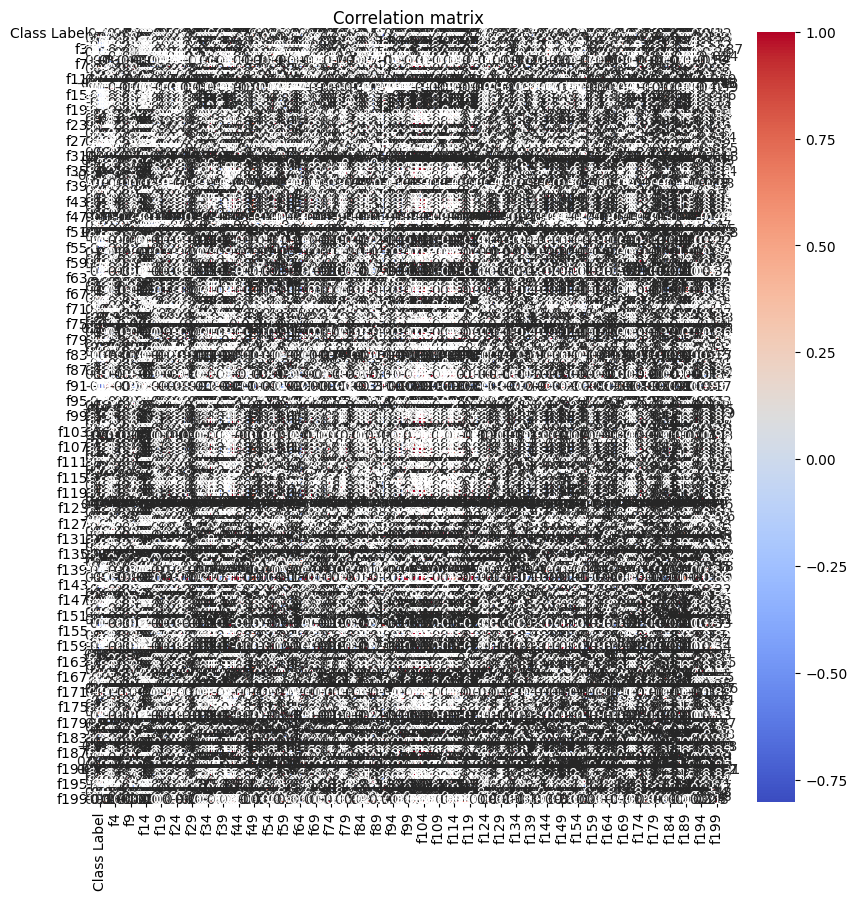

In [5]:
cm = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [6]:
numerical_data = df.select_dtypes(include=np.number)
rank = np.linalg.matrix_rank(numerical_data)
print(f"Matrix Rank: {rank}")

Matrix Rank: 175


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization example
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.describe


<bound method NDFrame.describe of       Class Label        f0   f1   f2   f3   f4   f5        f6   f7        f8  \
0             1.0  0.064669  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.040959   
1             1.0  0.160217  0.0  0.0  0.0  0.0  0.0  0.224739  0.0  0.171410   
2             1.0  0.064161  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.042968   
3             1.0  0.081506  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.058093   
4             1.0  0.082483  0.0  0.0  0.0  0.0  0.0  0.171430  0.0  0.106704   
...           ...       ...  ...  ...  ...  ...  ...       ...  ...       ...   
3248          1.0  0.361997  0.0  0.0  0.0  0.0  0.0  0.335203  0.0  0.348341   
3249          1.0  0.779230  0.0  0.0  0.0  0.0  0.0  0.601050  0.0  0.792415   
3250          1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.802806  0.0  1.000000   
3251          1.0  0.881269  0.0  0.0  0.0  0.0  0.0  0.947802  0.0  0.943358   
3252          1.0  0.230638  0.0  0.0  0.0  0.0  0.0  0.373579  0.0  0.2526

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Label', axis=1)
y = df['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2602, 200), (651, 200))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

knn = KNeighborsClassifier()
start=time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
end=time.time()
print('KNN accuracy: ', accuracy_score(y_test, y_pred))
print('KNN training accuracy: ', accuracy_score(y_train, y_pred_train))
print('KNN time: ', end-start)
print('KNN confusion matrix: ', confusion_matrix(y_test, y_pred))
print('KNN classification report: ', classification_report(y_test, y_pred))
print('KNN f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('KNN precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('KNN recall score: ', recall_score(y_test, y_pred, average='weighted'))
y_proba = knn.predict_proba(X_test)
print('KNN roc auc score: ', roc_auc_score(y_test, y_proba, multi_class='ovr'))


KNN accuracy:  0.9201228878648233
KNN training accuracy:  0.9419677171406611
KNN time:  0.5286858081817627
KNN confusion matrix:  [[206  26   1]
 [ 11 281   3]
 [  0  11 112]]
KNN classification report:                precision    recall  f1-score   support

           0       0.95      0.88      0.92       233
           1       0.88      0.95      0.92       295
           2       0.97      0.91      0.94       123

    accuracy                           0.92       651
   macro avg       0.93      0.92      0.92       651
weighted avg       0.92      0.92      0.92       651

KNN f1 score:  0.9202174334196078
KNN precision score:  0.9226169914143656
KNN recall score:  0.9201228878648233
KNN roc auc score:  0.9618764304022424


In [10]:
dt = DecisionTreeClassifier()
start=time.time()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
end=time.time()
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))
print('Decision Tree training accuracy: ', accuracy_score(y_train, y_pred_train))
print('Decision Tree time: ', end-start)
print('Decision Tree confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Decision Tree classification report: ', classification_report(y_test, y_pred))
print('Decision Tree f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('Decision Tree precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('Decision Tree recall score: ', recall_score(y_test, y_pred, average='weighted'))
y_proba = dt.predict_proba(X_test)
print('Decision Tree roc auc score: ', roc_auc_score(y_test, y_proba, multi_class='ovr'))


Decision Tree accuracy:  0.9047619047619048
Decision Tree training accuracy:  1.0
Decision Tree time:  0.29759836196899414
Decision Tree confusion matrix:  [[207  25   1]
 [ 22 270   3]
 [  0  11 112]]
Decision Tree classification report:                precision    recall  f1-score   support

           0       0.90      0.89      0.90       233
           1       0.88      0.92      0.90       295
           2       0.97      0.91      0.94       123

    accuracy                           0.90       651
   macro avg       0.92      0.90      0.91       651
weighted avg       0.91      0.90      0.90       651

Decision Tree f1 score:  0.9049627938450381
Decision Tree precision score:  0.9057887232883741
Decision Tree recall score:  0.9047619047619048
Decision Tree roc auc score:  0.9254840713529718


In [11]:
rf = RandomForestClassifier()
start=time.time()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
end=time.time()
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))
print('Random Forest training accuracy: ', accuracy_score(y_train, y_pred_train))
print('Random Forest time: ', end-start)
print('Random Forest confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Random Forest classification report: ', classification_report(y_test, y_pred))
print('Random Forest f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('Random Forest precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('Random Forest recall score: ', recall_score(y_test, y_pred, average='weighted'))
y_proba = rf.predict_proba(X_test)
print('Random Forest roc auc score: ', roc_auc_score(y_test, y_proba, multi_class='ovr'))


Random Forest accuracy:  0.9293394777265745
Random Forest training accuracy:  1.0
Random Forest time:  1.9325048923492432
Random Forest confusion matrix:  [[209  23   1]
 [ 10 284   1]
 [  0  11 112]]
Random Forest classification report:                precision    recall  f1-score   support

           0       0.95      0.90      0.92       233
           1       0.89      0.96      0.93       295
           2       0.98      0.91      0.95       123

    accuracy                           0.93       651
   macro avg       0.94      0.92      0.93       651
weighted avg       0.93      0.93      0.93       651

Random Forest f1 score:  0.9294482714186344
Random Forest precision score:  0.9318924045370516
Random Forest recall score:  0.9293394777265745
Random Forest roc auc score:  0.9835296626875435


In [12]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
start=time.time()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_pred_train = nb.predict(X_train)
end=time.time()
print('Naive Bayes accuracy: ', accuracy_score(y_test, y_pred))
print('Naive Bayes training accuracy: ', accuracy_score(y_train, y_pred_train))
print('Naive Bayes time: ', end-start)
print('Naive Bayes confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Naive Bayes classification report: ', classification_report(y_test, y_pred))
print('Naive Bayes f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('Naive Bayes precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('Naive Bayes recall score: ', recall_score(y_test, y_pred, average='weighted'))
y_proba = nb.predict_proba(X_test)
print('Naive Bayes roc auc score: ', roc_auc_score(y_test, y_proba, multi_class='ovr'))


Naive Bayes accuracy:  0.9247311827956989
Naive Bayes training accuracy:  0.9231360491929285
Naive Bayes time:  0.1248326301574707
Naive Bayes confusion matrix:  [[211  21   1]
 [ 13 281   1]
 [  0  13 110]]
Naive Bayes classification report:                precision    recall  f1-score   support

           0       0.94      0.91      0.92       233
           1       0.89      0.95      0.92       295
           2       0.98      0.89      0.94       123

    accuracy                           0.92       651
   macro avg       0.94      0.92      0.93       651
weighted avg       0.93      0.92      0.92       651

Naive Bayes f1 score:  0.9248712480283298
Naive Bayes precision score:  0.9269431338843781
Naive Bayes recall score:  0.9247311827956989
Naive Bayes roc auc score:  0.9625489721764525


In [16]:
from sklearn.svm import SVC
ss = SVC(probability=True)
start=time.time()
ss.fit(X_train, y_train)
y_pred = ss.predict(X_test)
y_pred_train = ss.predict(X_train)
end=time.time()
print('SVM accuracy: ', accuracy_score(y_test, y_pred))
print('SVM training accuracy: ', accuracy_score(y_train, y_pred_train))
print('SVM time: ', end-start)
print('SVM confusion matrix: ', confusion_matrix(y_test, y_pred))
print('SVM classification report: ', classification_report(y_test, y_pred))
print('SVM f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('SVM precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('SVM recall score: ', recall_score(y_test, y_pred, average='weighted'))
y_proba = ss.predict_proba(X_test)
print('SVM roc auc score: ', roc_auc_score(y_test, y_proba, multi_class='ovr'))


SVM accuracy:  0.9185867895545314
SVM training accuracy:  0.9304381245196003
SVM time:  2.513184070587158
SVM confusion matrix:  [[208  25   0]
 [ 11 284   0]
 [  0  17 106]]
SVM classification report:                precision    recall  f1-score   support

           0       0.95      0.89      0.92       233
           1       0.87      0.96      0.91       295
           2       1.00      0.86      0.93       123

    accuracy                           0.92       651
   macro avg       0.94      0.91      0.92       651
weighted avg       0.92      0.92      0.92       651

SVM f1 score:  0.9187931487771113
SVM precision score:  0.9236415801592057
SVM recall score:  0.9185867895545314
SVM roc auc score:  0.9765133138822998


In [17]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test):
    # Define models
    models = {
        "Random Forest": RandomForestClassifier(),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(probability=True),
        "Naive": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier()
    }

    # Evaluate models
    results = []
    for model_name, model in models.items():
        # Record training time
        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        
        # Record prediction time
        start_predict = time.time()
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        end_predict = time.time()
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Determine fit type
        if train_accuracy > test_accuracy:
            fit_status = "Overfitting"
        elif train_accuracy < test_accuracy:
            fit_status = "Underfitting"
        else:
            fit_status = "Well-Fitted"
        
        # Store results
        results.append({
            "Model": model_name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Fit Status": fit_status,
            "Training Time (s)": round(end_train - start_train, 4),
            "Prediction Time (s)": round(end_predict - start_predict, 4)
        })

    # Return results as DataFrame
    return pd.DataFrame(results)

# Example usage
if __name__ == "__main__":

    # Data splitting
    X = df.drop(columns=['Class Label'])
    y = df['Class Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Evaluate models
    results_df = evaluate_models(X_train, X_test, y_train, y_test)
    print(results_df)


           Model  Train Accuracy  Test Accuracy    Fit Status  \
0  Random Forest        1.000000       0.936118   Overfitting   
1            KNN        0.940549       0.928747   Overfitting   
2            SVM        0.929479       0.923833   Overfitting   
3          Naive        0.921689       0.927518  Underfitting   
4  Decision Tree        1.000000       0.916462   Overfitting   

   Training Time (s)  Prediction Time (s)  
0             1.4083               0.0985  
1             0.0711               0.4010  
2             1.4773               0.4687  
3             0.0338               0.0697  
4             0.2605               0.0215  
